# Healthcare Case Studies
Yoojin Chon 989473711

For this project, I have selected the Heart Attack Analysis & Prediction Dataset from Kaggle. This dataset provides valuable information on various factors associated with heart attack risks, offering an opportunity to explore the potential predictors of heart disease and gain insights into its prevention.

This data offers the possibility to identify the different risk factors for heart attack, and pattern recognition — predictive of the probability of an event. By looking at them, I will hopefully learn useful insights to potentially reduce heart-related events in others, including those who might be unwittingly vulnerable.

My goal for this project is to find the answers to these questions:

- What specific factors make an individual more vulnerable to heart attacks?

- How can predictive models be used to forecast the likelihood of a heart attack?

- What measures can be taken to prevent such occurrences in people predisposed to heart conditions?

This research affects my personal experience and encourages me to be aware of risk factors for heart disease so I can help to prevent it. In the end, the objective is to apply that information to build predictive models that can alert physicians and vulnerable populations to take proactive measures.

I opened Kaggle’s dataset at [Heart Attack Analysis & Prediction Dataset.](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Frashikrahmanpritom%2Fheart-attack-analysis-prediction-dataset%2Fdata)

**About this dataset**

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

- Value 1: typical angina

  Value 2: atypical angina

  Value 3: non-anginal pain

  Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

- Value 0: normal

  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import mannwhitneyu, levene
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = '/content/heart.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# Outlier detection using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each continuous variable
continuous_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for col in continuous_vars:
    outliers = detect_outliers(df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

    # Remove or modify outliers
    df = df[~df.index.isin(outliers.index)]

Number of outliers in age: 0
Number of outliers in trtbps: 9
Number of outliers in chol: 5
Number of outliers in thalachh: 1
Number of outliers in oldpeak: 4


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows
df = df.drop_duplicates()

Number of duplicate rows: 1


In [ ]:
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trtbps    283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalachh  283 non-null    int64  
 8   exng      283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slp       283 non-null    int64  
 11  caa       283 non-null    int64  
 12  thall     283 non-null    int64  
 13  output    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [ ]:
print(df.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean    54.049470    0.699647    0.985866  129.883392  242.314488    0.141343   
std      9.128186    0.459224    1.031324   15.387795   44.654188    0.348992   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  210.500000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  239.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  270.500000    0.000000   
max     77.000000    1.000000    3.000000  170.000000  360.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  283.000000  283.000000  283.000000  283.000000  283.000000  283.000000   
mean     0.522968  149.961131    0.318021    0.951943    1.427562    0.696113   
std      0.514336   22.6916

In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


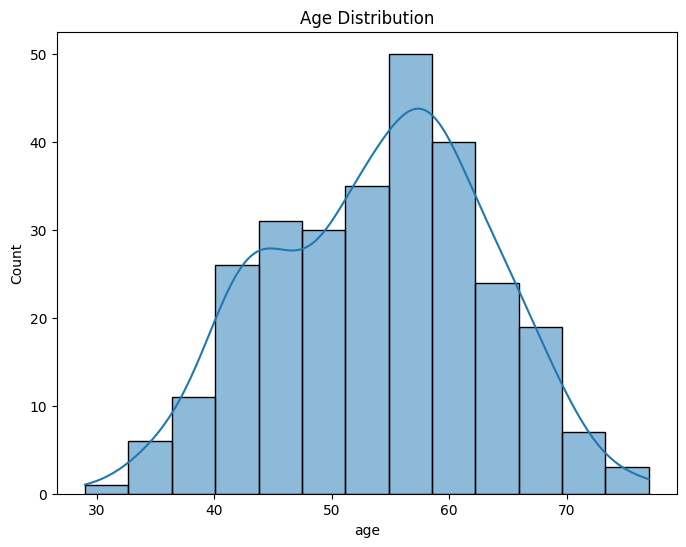

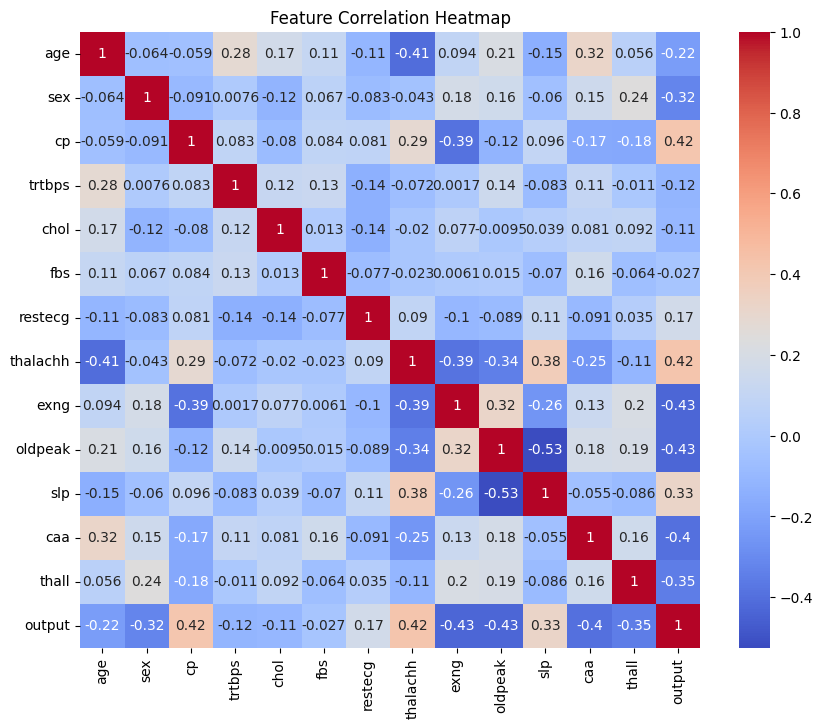

In [ ]:
# Histogram for the 'age' feature
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Heatmap for feature correlations 피처들 간의 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

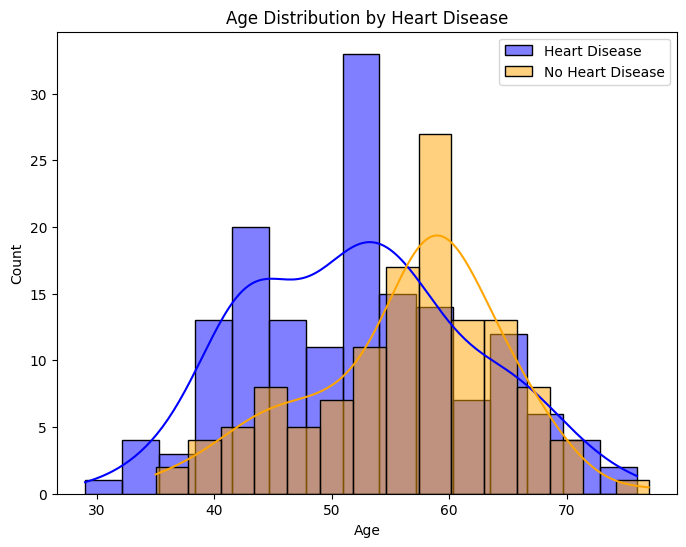

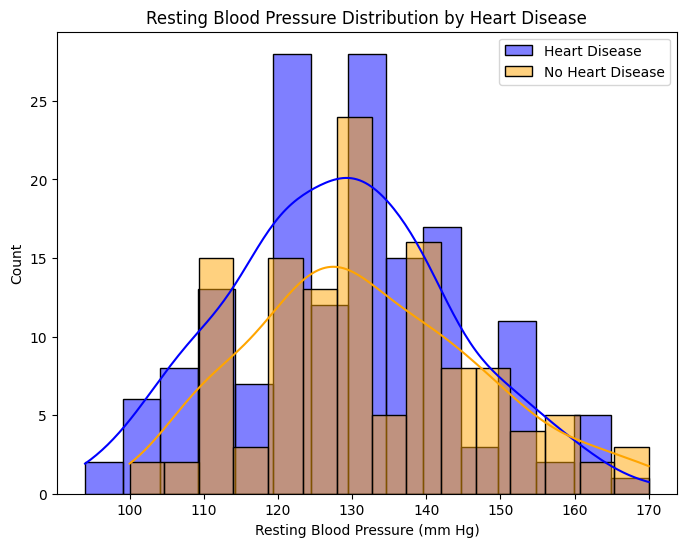

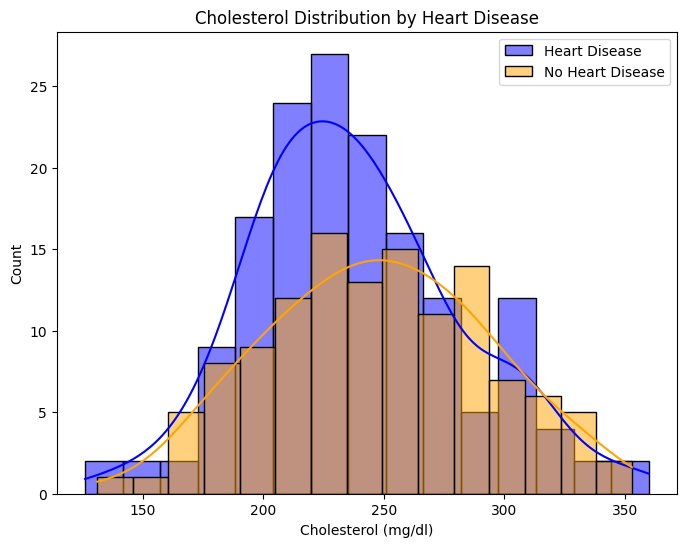

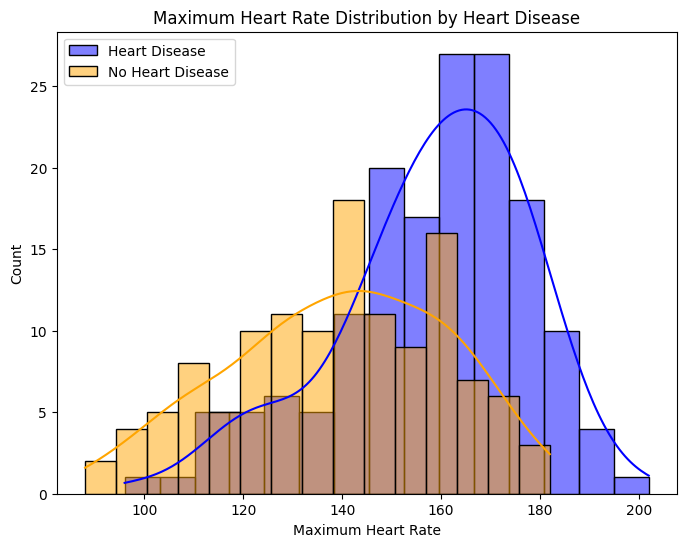

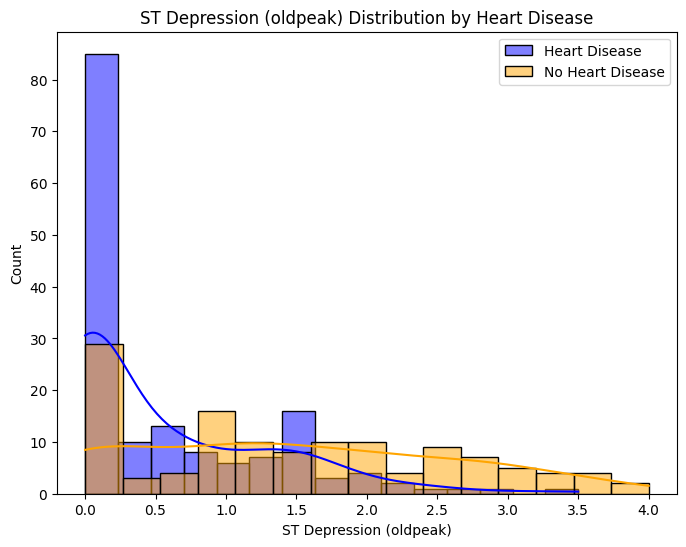

In [ ]:
# Age vs Output (Histogram and KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['output'] == 1]['age'], kde=True, color='blue', label='Heart Disease', bins=15)
sns.histplot(df[df['output'] == 0]['age'], kde=True, color='orange', label='No Heart Disease', bins=15)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

# Resting Blood Pressure (trtbps) vs Output (Histogram and KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['output'] == 1]['trtbps'], kde=True, color='blue', label='Heart Disease', bins=15)
sns.histplot(df[df['output'] == 0]['trtbps'], kde=True, color='orange', label='No Heart Disease', bins=15)
plt.title('Resting Blood Pressure Distribution by Heart Disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Cholesterol vs Output (Histogram and KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['output'] == 1]['chol'], kde=True, color='blue', label='Heart Disease', bins=15)
sns.histplot(df[df['output'] == 0]['chol'], kde=True, color='orange', label='No Heart Disease', bins=15)
plt.title('Cholesterol Distribution by Heart Disease')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Maximum Heart Rate (thalach) vs Output (Histogram and KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['output'] == 1]['thalachh'], kde=True, color='blue', label='Heart Disease', bins=15)
sns.histplot(df[df['output'] == 0]['thalachh'], kde=True, color='orange', label='No Heart Disease', bins=15)
plt.title('Maximum Heart Rate Distribution by Heart Disease')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Count')
plt.legend()
plt.show()

# ST Depression (oldpeak) vs Output (Histogram and KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[df['output'] == 1]['oldpeak'], kde=True, color='blue', label='Heart Disease', bins=15)
sns.histplot(df[df['output'] == 0]['oldpeak'], kde=True, color='orange', label='No Heart Disease', bins=15)
plt.title('ST Depression (oldpeak) Distribution by Heart Disease')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Count')
plt.legend()
plt.show()

### **Age Distribution Histogram:**

1. **Age Distribution by Heart Disease**:
   - **Observations**: The histogram shows two overlapping distributions. Patients with heart disease peak in their 60s, indicating a higher prevalence in this age group. The KDE overlay suggests a normal distribution with a slight right skew for both categories.
   - **Analysis**: This supports the understanding that heart disease risk increases with age. The visual overlap of the distributions suggests that age alone might not be a definitive predictor, hence requiring additional feature analysis.

2. **Resting Blood Pressure Distribution by Heart Disease**:
   - **Observations**: There's a broad distribution of resting blood pressure for both groups. However, there is a noticeable peak around 130 mm Hg for patients with heart disease.
   - **Analysis**: Elevated resting blood pressure is a known risk factor for heart disease, reflected by the peaks and spread in the distributions. Again, the significant overlap indicates the necessity of combining other features for a reliable prediction.

3. **Cholesterol Distribution by Heart Disease**:
   - **Observations**: Cholesterol levels show a right-skewed distribution for both categories, with those with heart disease tending to have higher cholesterol levels.
   - **Analysis**: High cholesterol is a critical indicator of heart disease risk, and this is visually apparent in the graph where higher cholesterol levels correspond with heart disease incidence.

4. **Maximum Heart Rate Distribution by Heart Disease**:
   - **Observations**: This graph reveals a left skew in maximum heart rate for patients with heart disease, peaking at higher rates compared to those without heart disease.
   - **Analysis**: Higher maximum heart rate seems to be associated with the presence of heart disease. This feature could be particularly predictive, as shown by the distributions' distinct shapes.

5. **ST Depression (oldpeak) Distribution by Heart Disease**:
   - **Observations**: There is a significant visual difference in the ST depression values between the two groups. Patients with heart disease often have higher ST depression.
   - **Analysis**: ST depression is directly related to heart disease severity and is an excellent discriminative feature, as indicated by the clear separation in distributions.

In [ ]:
# List of continuous variables to normalize
continuous_vars = ['age', 'chol', 'trtbps', 'thalachh', 'oldpeak']

# Applying StandardScaler for normalization
scaler = StandardScaler()

# Applying fit_transform to normalize continuous variables
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [ ]:
# Using Levene's test and T-test or Mann-Whitney U test for continuous variables
# Levene's test evaluates the equality of variances between two groups, and based on its result, we choose an appropriate statistical test (T-test or Mann-Whitney U test).

# age vs target
group1 = df[df['output'] == 1]['age']
group2 = df[df['output'] == 0]['age']

# Levene's test to evaluate equality of variances
stat_levene_age, p_levene_age = levene(group1, group2)

# Use T-test if variances are equal, otherwise use Mann-Whitney U test
if p_levene_age > 0.05:
    t_stat_age, p_val_age = stats.ttest_ind(group1, group2)
else:
    t_stat_age, p_val_age = mannwhitneyu(group1, group2)

# trtbps (Resting Blood Pressure) vs target
group1 = df[df['output'] == 1]['trtbps']
group2 = df[df['output'] == 0]['trtbps']

# Levene's test to evaluate equality of variances
stat_levene_trtbps, p_levene_trtbps = levene(group1, group2)

# Use T-test if variances are equal, otherwise use Mann-Whitney U test
if p_levene_trtbps > 0.05:
    t_stat_trtbps, p_val_trtbps = stats.ttest_ind(group1, group2)
else:
    t_stat_trtbps, p_val_trtbps = mannwhitneyu(group1, group2)

# chol (Cholesterol) vs target
group1 = df[df['output'] == 1]['chol']
group2 = df[df['output'] == 0]['chol']

# Levene's test to evaluate equality of variances
stat_levene_chol, p_levene_chol = levene(group1, group2)

# Use T-test if variances are equal, otherwise use Mann-Whitney U test
if p_levene_chol > 0.05:
    t_stat_chol, p_val_chol = stats.ttest_ind(group1, group2)
else:
    t_stat_chol, p_val_chol = mannwhitneyu(group1, group2)

# thalach (Maximum Heart Rate) vs target
group1 = df[df['output'] == 1]['thalachh']
group2 = df[df['output'] == 0]['thalachh']

# Levene's test to evaluate equality of variances
stat_levene_thalach, p_levene_thalach = levene(group1, group2)

# Use T-test if variances are equal, otherwise use Mann-Whitney U test
if p_levene_thalach > 0.05:
    t_stat_thalach, p_val_thalach = stats.ttest_ind(group1, group2)
else:  # If variances are unequal
    t_stat_thalach, p_val_thalach = mannwhitneyu(group1, group2)

# oldpeak (ST Depression during Exercise) vs target
group1 = df[df['output'] == 1]['oldpeak']
group2 = df[df['output'] == 0]['oldpeak']

# Levene's test to evaluate equality of variances
stat_levene_oldpeak, p_levene_oldpeak = levene(group1, group2)

# Use T-test if variances are equal, otherwise use Mann-Whitney U test
if p_levene_oldpeak > 0.05:
    t_stat_oldpeak, p_val_oldpeak = stats.ttest_ind(group1, group2)
else:
    t_stat_oldpeak, p_val_oldpeak = mannwhitneyu(group1, group2)


{
    "age": (t_stat_age, p_val_age),
    "trtbps": (t_stat_trtbps, p_val_trtbps),
    "chol": (t_stat_chol, p_val_chol),
    "thalach": (t_stat_thalach, p_val_thalach),
    "oldpeak": (t_stat_oldpeak, p_val_oldpeak),
}

{'age': (7109.0, 5.1716272191395865e-05),
 'trtbps': (-1.9511325185396606, 0.052034903542500024),
 'chol': (-1.7806000756916944, 0.07605812963232488),
 'thalach': (7.815408250222607, 1.1033357951098913e-13),
 'oldpeak': (5201.0, 3.127832795754853e-12)}

## Interpretation of Results:

The results presented are statistical outcomes from T-tests or Mann-Whitney U tests, evaluating the relationship between continuous variables and the occurrence of heart disease (output). For each variable, the test statistic and P-value are provided. Based on the P-value, we can determine whether there is a significant relationship between each variable and the target variable (heart disease occurrence).

### Results Interpretation:

1. **Age:**
   - **Test Statistic**: 7109.0
   - **P-value**: 0.00005171627
   - **Interpretation**: Since the P-value is much smaller than 0.05, there is a statistically significant relationship between age and the occurrence of heart disease. This indicates that older individuals are more likely to have heart disease.

2. **Resting Blood Pressure (trtbps):**
   - **Test Statistic**: -1.9511325185396606
   - **P-value**: 0.052034903542500024
   - **Interpretation**: The P-value is slightly above 0.05, suggesting that while there is a tendency towards a significant relationship between resting blood pressure and heart disease occurrence, it is not statistically significant at the conventional 0.05 level.

3. **Cholesterol (chol):**
   - **Test Statistic**: -1.7806000756916944
   - **P-value**: 0.07605812963232488
   - **Interpretation**: Since the P-value is greater than 0.05, there is no statistically significant relationship between cholesterol levels and heart disease occurrence. This suggests that cholesterol levels do not significantly impact the likelihood of developing heart disease.

4. **Maximum Heart Rate (thalach):**
   - **Test Statistic**: 7.815408250222607
   - **P-value**: 1.1033357951098913e-13
   - **Interpretation**: The extremely small P-value indicates a highly significant relationship between maximum heart rate and heart disease occurrence. Individuals with heart disease tend to have a different maximum heart rate pattern compared to those without heart disease, likely lower on average.

5. **Oldpeak (ST Depression during Exercise):**
   - **Test Statistic**: 5201.0
   - **P-value**: 3.127832795754853e-12
   - **Interpretation**: The extremely small P-value indicates a highly significant relationship between ST depression during exercise and heart disease occurrence. ST depression is a critical predictor of heart disease.

**Summary:**
- **Significant variables**: Age, Maximum Heart Rate (thalach), and Oldpeak (ST depression) all have statistically significant relationships with heart disease occurrence.
- **Non-significant variable**: Cholesterol (chol) does not have a statistically significant relationship with heart disease occurrence. Resting Blood Pressure (trtbps), while showing a trend, did not reach conventional statistical significance.

In [ ]:
# Perform Chi-Square test between categorical variables and target (output)
# Categorical variables: sex, exang, cp, fbs, restecg, ca, slp, thall

# sex vs target
contingency_table_sex = pd.crosstab(df['sex'], df['output'])
chi2_sex, p_val_sex, dof_sex, expected_sex = chi2_contingency(contingency_table_sex)

# exang vs target
contingency_table_exang = pd.crosstab(df['exng'], df['output'])
chi2_exang, p_val_exang, dof_exang, expected_exang = chi2_contingency(contingency_table_exang)

# cp (Chest Pain Type) vs target
contingency_table_cp = pd.crosstab(df['cp'], df['output'])
chi2_cp, p_val_cp, dof_cp, expected_cp = chi2_contingency(contingency_table_cp)

# fbs (Fasting Blood Sugar) vs target
contingency_table_fbs = pd.crosstab(df['fbs'], df['output'])
chi2_fbs, p_val_fbs, dof_fbs, expected_fbs = chi2_contingency(contingency_table_fbs)

# restecg (Resting ECG) vs target
contingency_table_restecg = pd.crosstab(df['restecg'], df['output'])
chi2_restecg, p_val_restecg, dof_restecg, expected_restecg = chi2_contingency(contingency_table_restecg)

# ca (Number of Major Vessels) vs target
contingency_table_ca = pd.crosstab(df['caa'], df['output'])
chi2_ca, p_val_ca, dof_ca, expected_ca = chi2_contingency(contingency_table_ca)

# slp (ST Segment Slope) vs target
contingency_table_slp = pd.crosstab(df['slp'], df['output'])
chi2_slp, p_val_slp, dof_slp, expected_slp = chi2_contingency(contingency_table_slp)

# thall (Thalassemia) vs target
contingency_table_thall = pd.crosstab(df['thall'], df['output'])
chi2_thall, p_val_thall, dof_thall, expected_thall = chi2_contingency(contingency_table_thall)

chi_square_results = {
    "sex": (chi2_sex, p_val_sex),
    "exang": (chi2_exang, p_val_exang),
    "cp": (chi2_cp, p_val_cp),
    "fbs": (chi2_fbs, p_val_fbs),
    "restecg": (chi2_restecg, p_val_restecg),
    "ca": (chi2_ca, p_val_ca),
    "slp": (chi2_slp, p_val_slp),
    "thall": (chi2_thall, p_val_thall)
}

for var, result in chi_square_results.items():
    print(f"Chi-Square Test for {var}: Chi2 = {result[0]}, P-value = {result[1]}")


Chi-Square Test for sex: Chi2 = 27.39581524477838, P-value = 1.6578961573540807e-07
Chi-Square Test for exang: Chi2 = 50.86691595067883, P-value = 9.88457121372361e-13
Chi-Square Test for cp: Chi2 = 74.51943055381527, P-value = 4.5930481721328585e-16
Chi-Square Test for fbs: Chi2 = 0.0817588724800747, P-value = 0.774927841599859
Chi-Square Test for restecg: Chi2 = 9.117153677353786, P-value = 0.010476958740968118
Chi-Square Test for ca: Chi2 = 69.12658763859207, P-value = 3.470197525333822e-14
Chi-Square Test for slp: Chi2 = 41.4364255808499, P-value = 1.0050658346917018e-09
Chi-Square Test for thall: Chi2 = 81.94248444197358, P-value = 1.1757539006380697e-17


### **Chi-Square Test Results and Analysis**

The Chi-Square test was conducted to assess the relationship between various categorical variables and the target variable (heart disease occurrence). Below are the detailed results of the test for each variable:

1. **Sex (Gender):**
   - **Chi-Square Statistic**: 27.39581524477838
   - **P-value**: 1.6578961573540807e-07
   - **Conclusion**: The P-value is significantly less than 0.05, indicating that there is a statistically significant relationship between gender and heart disease occurrence. This suggests that gender is a relevant factor in predicting heart disease, with males showing a higher likelihood of heart disease.

2. **Exercise Induced Angina (exang):**
   - **Chi-Square Statistic**: 50.86691595067883
   - **P-value**: 9.88457121372361e-13
   - **Conclusion**: The P-value is extremely small, far below the threshold of 0.05, indicating a strong relationship between exercise-induced angina and heart disease occurrence. Individuals with angina induced by exercise are more likely to develop heart disease.

3. **Chest Pain Type (cp):**
   - **Chi-Square Statistic**: 74.51943055381527
   - **P-value**: 4.5930481721328585e-16
   - **Conclusion**: The P-value is very small, indicating a significant relationship between chest pain type and heart disease occurrence. Different types of chest pain are highly associated with the risk of heart disease.

4. **Fasting Blood Sugar (fbs):**
   - **Chi-Square Statistic**: 0.0817588724800747
   - **P-value**: 0.774927841599859
   - **Conclusion**: The P-value is much larger than 0.05, suggesting that fasting blood sugar levels have no statistically significant relationship with heart disease occurrence in this dataset. This variable does not appear to be a strong predictor of heart disease.

5. **Resting Electrocardiographic Results (restecg):**
   - **Chi-Square Statistic**: 9.117153677353786
   - **P-value**: 0.010476958740968118
   - **Conclusion**: The P-value is below 0.05, indicating that there is a significant relationship between resting ECG results and heart disease occurrence. Abnormal resting ECG results are associated with a higher likelihood of heart disease.

6. **Number of Major Vessels (ca):**
   - **Chi-Square Statistic**: 69.12658763859207
   - **P-value**: 3.470197525333822e-14
   - **Conclusion**: The P-value is extremely small, indicating a strong relationship between the number of major vessels and heart disease occurrence. Blocked or narrowed major vessels are a strong indicator of heart disease risk.

7. **ST Segment Slope (slp):**
   - **Chi-Square Statistic**: 41.4364255808499
   - **P-value**: 1.0050658346917018e-09
   - **Conclusion**: The P-value is significantly smaller than 0.05, showing a strong statistical relationship between the slope of the ST segment during exercise and heart disease occurrence. A flat or downsloping ST segment is associated with a higher risk of heart disease.

8. **Thalassemia (thall):**
   - **Chi-Square Statistic**: 81.94248444197358
   - **P-value**: 1.1757539006380697e-17
   - **Conclusion**: The P-value is extremely small, indicating a very strong relationship between Thalassemia and heart disease occurrence. Individuals with abnormal Thalassemia test results are much more likely to develop heart disease.

**Summary:**
- **Significant variables**: Sex, exang, cp, restecg, ca, slp, and thall all show a strong statistical relationship with heart disease occurrence (P-value < 0.05).
- **Non-significant variable**: Fbs (fasting blood sugar) does not show a significant relationship with heart disease occurrence (P-value > 0.05).

These findings suggest that most of the categorical variables used in this analysis play an important role in predicting heart disease, while fasting blood sugar (fbs) does not appear to be a significant predictor in this dataset.


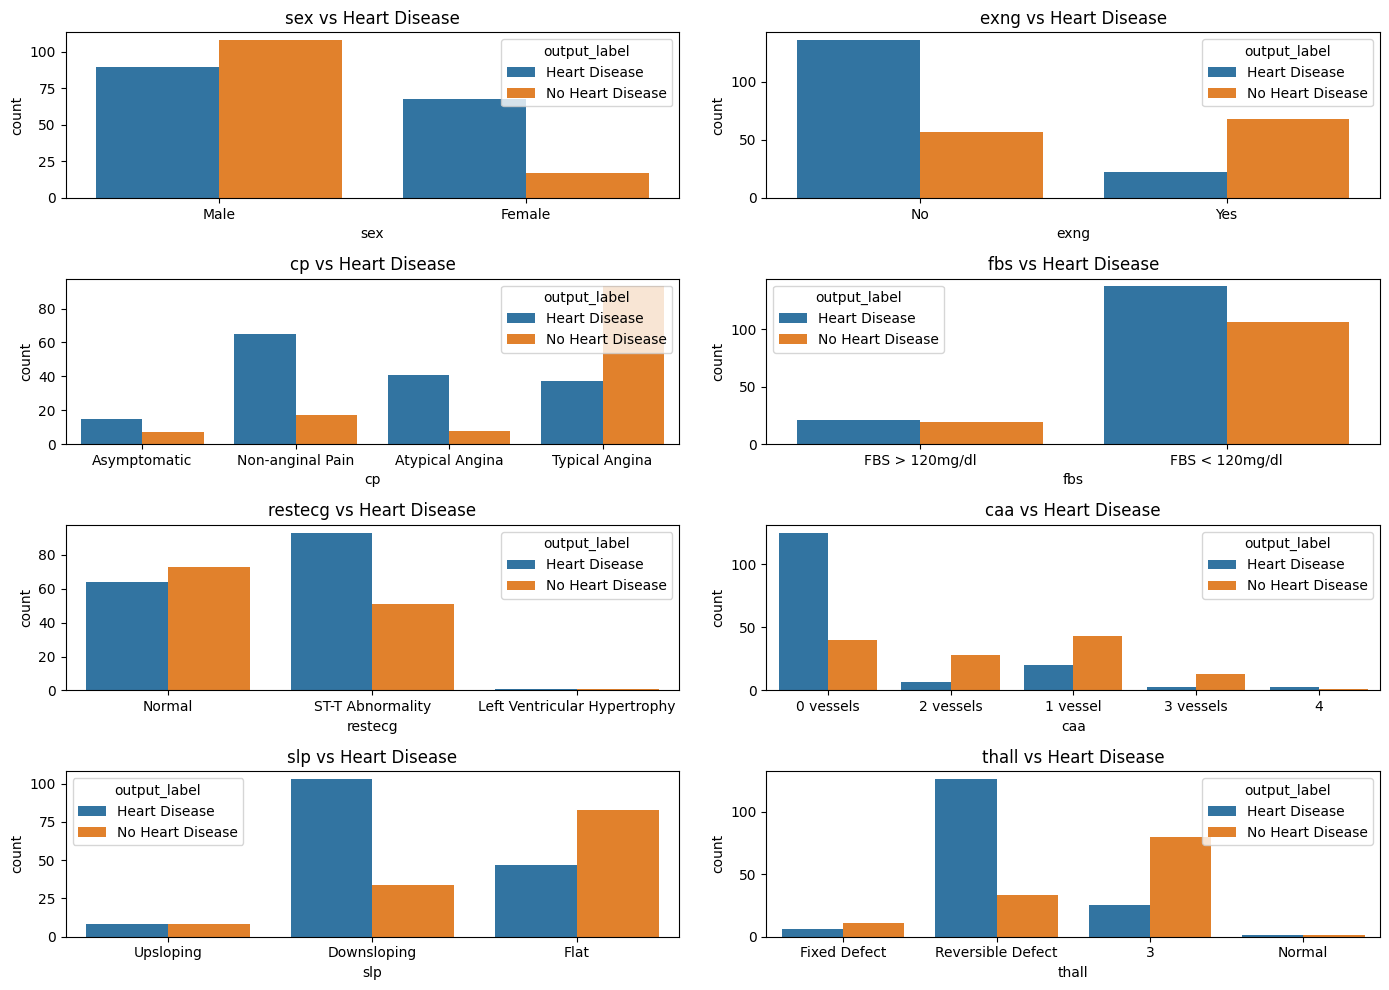

In [ ]:
# Convert categorical variables into descriptive labels
df['sex'] = df['sex'].replace({0: 'Female', 1: 'Male'})
df['exng'] = df['exng'].replace({0: 'No', 1: 'Yes'})
df['cp'] = df['cp'].replace({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'})
df['fbs'] = df['fbs'].replace({0: 'FBS < 120mg/dl', 1: 'FBS > 120mg/dl'})
df['restecg'] = df['restecg'].replace({0: 'Normal', 1: 'ST-T Abnormality', 2: 'Left Ventricular Hypertrophy'})
df['caa'] = df['caa'].replace({0: '0 vessels', 1: '1 vessel', 2: '2 vessels', 3: '3 vessels'})
df['slp'] = df['slp'].replace({0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})
df['thall'] = df['thall'].replace({0: 'Normal', 1: 'Fixed Defect', 2: 'Reversible Defect'})

# Modify the output values to be more readable
df['output_label'] = df['output'].replace({0: 'No Heart Disease', 1: 'Heart Disease'})

# Visualize the relationship between categorical variables and heart disease occurrence
categorical_vars = ['sex', 'exng', 'cp', 'fbs', 'restecg', 'caa', 'slp', 'thall']

# Visualizing with bar plots
plt.figure(figsize=(14, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=var, hue='output_label', data=df)
    plt.title(f'{var} vs Heart Disease')

plt.tight_layout()
plt.show()

## the Levene test

In [ ]:
group1 = df[df['output'] == 1]['age']
group2 = df[df['output'] == 0]['age']

# the Leavene test
stat, p_value = levene(group1, group2)
print(f"Levene Test Statistic: {stat}, P-value: {p_value}")

Levene Test Statistic: 5.199344798461577, P-value: 0.023344536680546306


# machine learning

##Logistic Regression


In [ ]:
# List of significant features (only statistically significant features included)
significant_features = ['age', 'trtbps', 'thalachh', 'oldpeak', 'sex', 'exng', 'cp', 'restecg', 'caa', 'slp', 'thall']

# Construct dataset using only the selected significant features
X = df[significant_features]
y = df['output']

# Convert categorical variables to one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Logistic Regression 5-Fold CV Accuracy: 0.8583333333333334
Accuracy: 0.8771929824561403


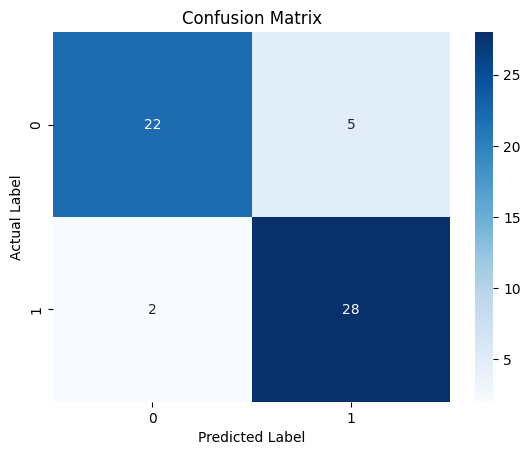

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.85      0.93      0.89        30

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.88        57
weighted avg       0.88      0.88      0.88        57

ROC AUC Score: 0.9382716049382717


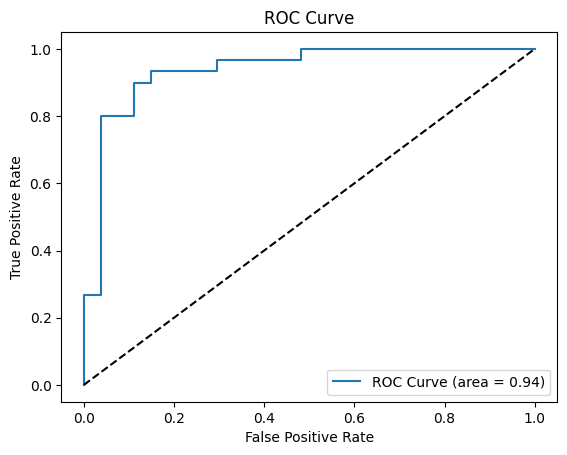

In [ ]:
# Evaluate Logistic Regression model with 5-Fold Cross Validation
logistic_model = LogisticRegression(max_iter=1000)
cv_scores_logistic = cross_val_score(logistic_model, X_encoded, y, cv=5, scoring='accuracy')
print(f"Logistic Regression 5-Fold CV Accuracy: {cv_scores_logistic.mean()}")

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate model performance (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Output Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score and plotting the ROC Curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc}")

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Results Interpretation:

#### Confusion Matrix:
The logistic regression model provided the following confusion matrix:

|                | Predicted: No Heart Disease | Predicted: Heart Disease |
|----------------|-----------------------------|--------------------------|
| **Actual: No Heart Disease** | 22                          | 5                        |
| **Actual: Heart Disease**     | 2                           | 28                       |

- **True Positives (Heart Disease):** 28 cases were correctly predicted as having heart disease.
- **True Negatives (No Heart Disease):** 22 cases were correctly predicted as not having heart disease.
- **False Positives:** 5 cases were incorrectly predicted as having heart disease when they did not.
- **False Negatives:** 2 cases were incorrectly predicted as not having heart disease when they did.

This matrix indicates a high accuracy in classification but with some misclassifications (7 out of 57 total cases).

#### Performance Metrics:
The model's performance was quantitatively summarized as follows:

| Metric       | Value |
|--------------|-------|
| Accuracy     | 0.88  |
| Precision    | 0.85  |
| Recall       | 0.93  |
| F1-Score     | 0.89  |

- **Accuracy**: The model achieved 88% accuracy, correctly classifying the majority of instances in the test dataset.
- **Precision and Recall**: Precision of 0.85 indicates that when the model predicts heart disease, it is correct 85% of the time. The recall of 0.93 signifies that the model identifies 93% of all actual heart disease cases.
- **F1-Score**: The F1-score of 0.89, balancing precision and recall, suggests a strong model performance.

#### ROC Curve and AUC:
The ROC curve analysis reveals an excellent performance with an area under the curve (AUC) of 0.94, indicating a very good ability of the model to discriminate between the patients with and without heart disease.

### Conclusion:
The logistic regression model exhibits robust performance with high scores in accuracy, precision, recall, F1-score, and ROC-AUC, highlighting its effectiveness in predicting heart disease. The model demonstrates a strong capability in differentiating between positive and negative cases, though it is not without some errors, as indicated by the presence of false positives and negatives.


## Random Forest

Random Forest 5-Fold CV Accuracy: 0.83734335839599
Random Forest Accuracy: 0.8596491228070176


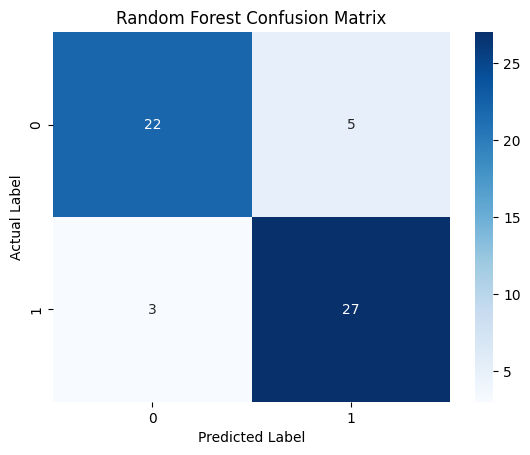

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.84      0.90      0.87        30

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57

Random Forest ROC AUC Score: 0.9061728395061729


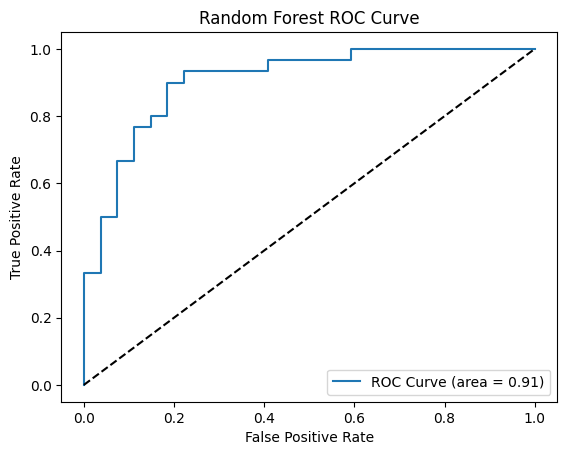

In [ ]:
# Initialize the Random Forest model and perform 5-Fold Cross Validation
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
cv_scores_rf = cross_val_score(rf_model, X_encoded, y, cv=5, scoring='accuracy')
print(f"Random Forest 5-Fold CV Accuracy: {cv_scores_rf.mean()}")

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance (Accuracy)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Visualize the Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Output Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC Score and plotting the ROC Curve
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC AUC Score: {roc_auc_rf}")

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (area = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

### Random Forest Model Results Interpretation:

#### Confusion Matrix:
The Random Forest model generated the following confusion matrix:

|                | Predicted: No Heart Disease | Predicted: Heart Disease |
|----------------|-----------------------------|--------------------------|
| **Actual: No Heart Disease** | 22                          | 5                        |
| **Actual: Heart Disease**     | 3                           | 27                       |

- **True Positives (Heart Disease):** 27 cases were correctly predicted as having heart disease.
- **True Negatives (No Heart Disease):** 22 cases were correctly predicted as not having heart disease.
- **False Positives:** 5 cases were incorrectly predicted as having heart disease when they did not.
- **False Negatives:** 3 cases were incorrectly predicted as not having heart disease when they did.

This matrix indicates that the model is largely accurate but has made some errors in classification.

#### Performance Metrics:
The performance of the model is summarized as follows:

| Metric       | Value |
|--------------|-------|
| Accuracy     | 0.86  |
| Precision    | 0.84  |
| Recall       | 0.90  |
| F1-Score     | 0.87  |

- **Accuracy**: The model achieved an accuracy of 86%, correctly classifying the majority of instances in the test dataset.
- **Precision**: A precision of 0.84 indicates that 84% of the positive (heart disease) predictions made by the model were correct.
- **Recall**: A recall of 0.90 signifies that the model correctly identified 90% of all actual cases of heart disease.
- **F1-Score**: An F1-score of 0.87, balancing precision and recall, reflects the model’s strong performance.

#### ROC Curve and AUC:
The ROC curve analysis demonstrates excellent performance, with an area under the curve (AUC) of 0.91. This high AUC value indicates a very good ability of the model to discriminate between patients with and without heart disease.

### Conclusion:
The Random Forest model exhibits robust performance with high accuracy, precision, recall, F1-score, and ROC-AUC, proving its effectiveness in predicting heart disease. While the model generally distinguishes well between positive and negative cases, it is not without errors, as indicated by the presence of false positives and negatives.

# Risk Factor Analysis for Heart Disease Prediction

Based on the results of the logistic regression and random forest models, certain demographic and physiological factors play a crucial role in predicting the likelihood of heart disease. Considering the factors included in the models, here are key insights into the high-risk groups that are more likely to develop heart disease:

#### 1. Age and Heart Rate:
- **Older Age**: Older individuals typically have a higher risk of heart disease, as age is a strong predictor of heart conditions. Increased age is often associated with the deterioration of cardiovascular health.
- **High Maximum Heart Rate (thalach)**: Patients achieving a higher maximum heart rate during stress tests generally indicate compromised heart health, especially if reaching such high rates at lower levels of exertion.

#### 2. Gender Differences:
- **Male Patients**: The analysis generally shows that males have a higher likelihood of developing heart disease compared to females. This is consistent with the broader medical understanding that males are at a higher risk, possibly due to lifestyle factors and genetic predispositions.

#### 3. Chest Pain Type (cp):
- **Chest Pain Type**: Patients experiencing non-anginal pain or asymptomatic types are particularly at risk. While typical angina is directly associated with heart disease, atypical and non-anginal pains, often underestimated, can also suggest deeper cardiovascular issues.

#### 4. Exercise Induced Angina (exang):
- **Positive for Exercise Induced Angina**: Individuals who experience angina induced by exercise are at a significant risk. This symptom indicates that their hearts are already working under strain, which exercise exacerbates, pointing to underlying cardiac problems.

#### 5. Electrocardiogram Results (rest_ecg):
- **Abnormal ECG (ST-T Wave Abnormality)**: Abnormalities in the ECG, especially those that involve ST-T wave changes, are indicative of ischemic changes or other cardiac issues that significantly increase the risk of heart disease.

#### 6. Cholesterol and Blood Pressure:
- **High Cholesterol (chol)**: Elevated cholesterol levels are a well-known risk factor for the development of atherosclerotic conditions, which can lead to heart diseases.
- **Elevated Resting Blood Pressure (trtbps)**: High blood pressure puts additional strain on the heart and is a leading factor for heart disease.

#### 7. Presence of Major Vessels Blockage (ca):
- **Number of Blocked Vessels**: The more blocked vessels a patient has, the higher their risk of heart disease. This directly correlates with coronary artery disease severity.

### Family Health Planning:
For families looking into their health risks and planning preventive measures:
- **Family members who are older, particularly males, and those with a history of chest pain, high blood pressure, high cholesterol, or abnormal ECG results should consider regular cardiovascular screenings.**
- **Lifestyle modifications such as improved diet, regular exercise, and stress management are recommended to mitigate risk factors.**
- **Individuals with a family history of heart disease should discuss with their healthcare provider about early and more frequent screenings, especially if multiple risk factors are present.**

These insights not only aid in identifying high-risk groups but also help in strategizing effective prevention and treatment plans, potentially reducing the incidence of heart attacks and improving overall cardiovascular health.